# Omid55
# team performance prediction
# UCSB-MIT study
# PlosOne and MBA dataset of teams with battery of tasks
# ----------------------------------------------------------------

Imports

In [25]:
import numpy as np
from sklearn import cross_validation
from sklearn import svm
from sklearn import metrics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import lasso_path, enet_path

Loading dataset

In [3]:
# plosOne dataset
file_path = 'plos_data_cropped.csv'

X = np.loadtxt(open(file_path,"rb"),delimiter=",",skiprows=1, usecols=range(0,125))   # 125 is column: "Big5_10 - Std"
#X = pd.read_csv(file_path)
tasks_no = 17
teams_no = len(X)

In [12]:
whole_data = pd.read_csv(file_path)
whole_data.head()

,Typing Text,Typing Numbers,Brainstorm Words,Brainstorm Equations,Brainstorm Brick,Judgement Pictures,Judgement Slogans,Judgement Trial,Judgement Pages,Sudoku,...,Big5_9 - Mean,Big5_9 - Max,Big5_9 - Min,Big5_9 - Std,Big5_10 - Mean,Big5_10 - Max,Big5_10 - Min,Big5_10 - Std,Speaking Count,Std Speaking
0,176.697998,371.368011,18.2159,9,19.738600,9.07,13.40,5.380000,219,14,...,3.75,4,3,0.433013,1.75,3,1,0.829156,8294.0,0.040003
1,499.863007,424.000000,18.5909,16,35.590698,12.61,15.92,17.440001,155,11,...,4.25,5,4,0.433013,2.75,5,1,1.785360,NaN,NaN
2,160.054001,75.013000,10.1818,0,11.488600,7.57,9.56,3.300000,168,0,...,4.00,4,4,0.000000,1.50,2,1,0.500000,NaN,NaN
3,170.949005,279.223999,19.9772,9,18.829399,10.79,10.92,8.140000,239,15,...,4.00,5,3,0.707107,2.50,3,1,0.866025,NaN,NaN
4,155.804001,276.032013,13.0681,5,10.352300,5.67,4.18,-0.040000,84,12,...,4.00,4,4,0.000000,2.00,3,1,0.816497,7210.0,0.138010


In [5]:
X = X / X.max(0)
features = X[:,tasks_no:len(X[0])]
features_names = whole_data.columns[tasks_no:len(X[0])]
targets = X[:,0:tasks_no]
targets_names = whole_data.columns[0:tasks_no]

Plotting

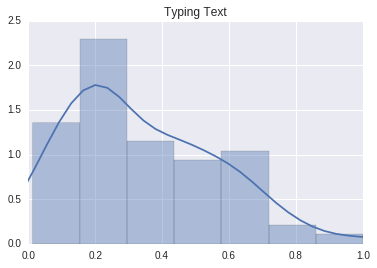

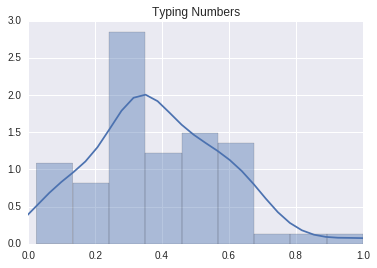

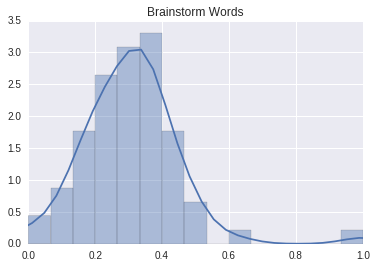

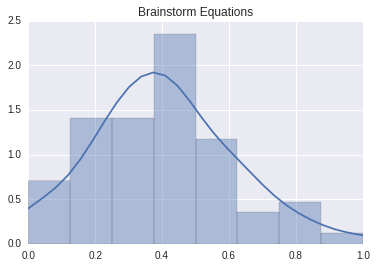

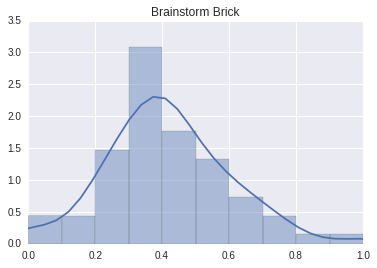

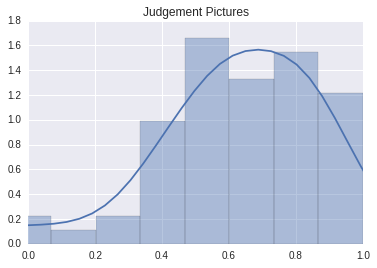

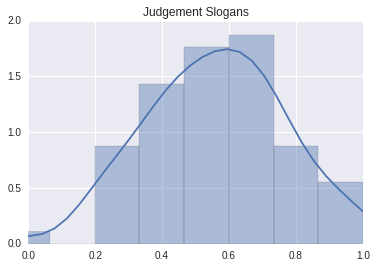

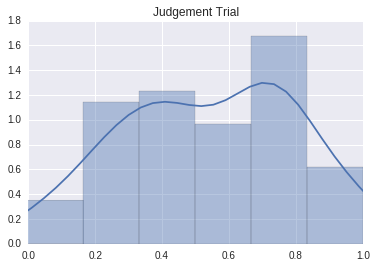

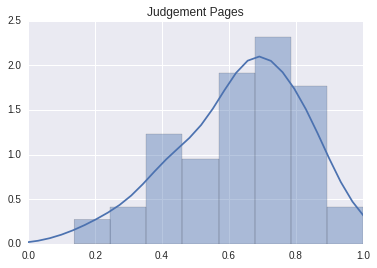

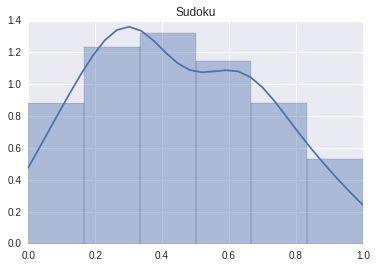

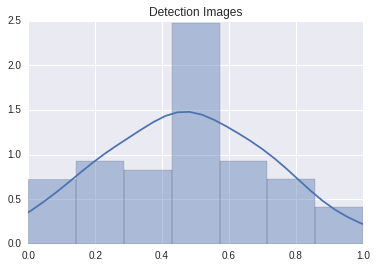

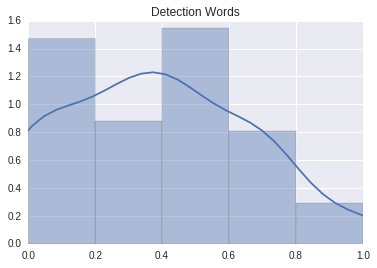

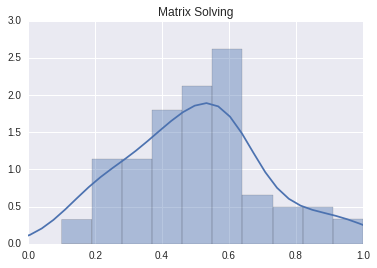

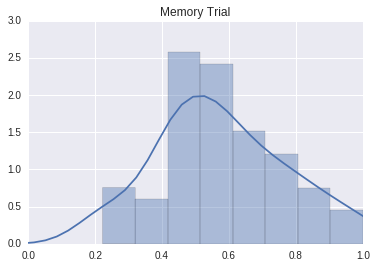

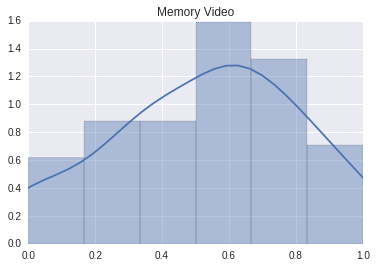

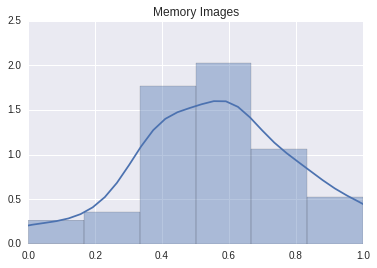

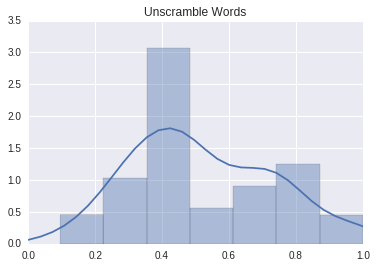

In [6]:
for i in range(len(targets[0])):
    p = sns.distplot(targets[:,i])
    p.set_xlim(0,1)
    p.set_title(targets_names[i])
    sns.plt.show()

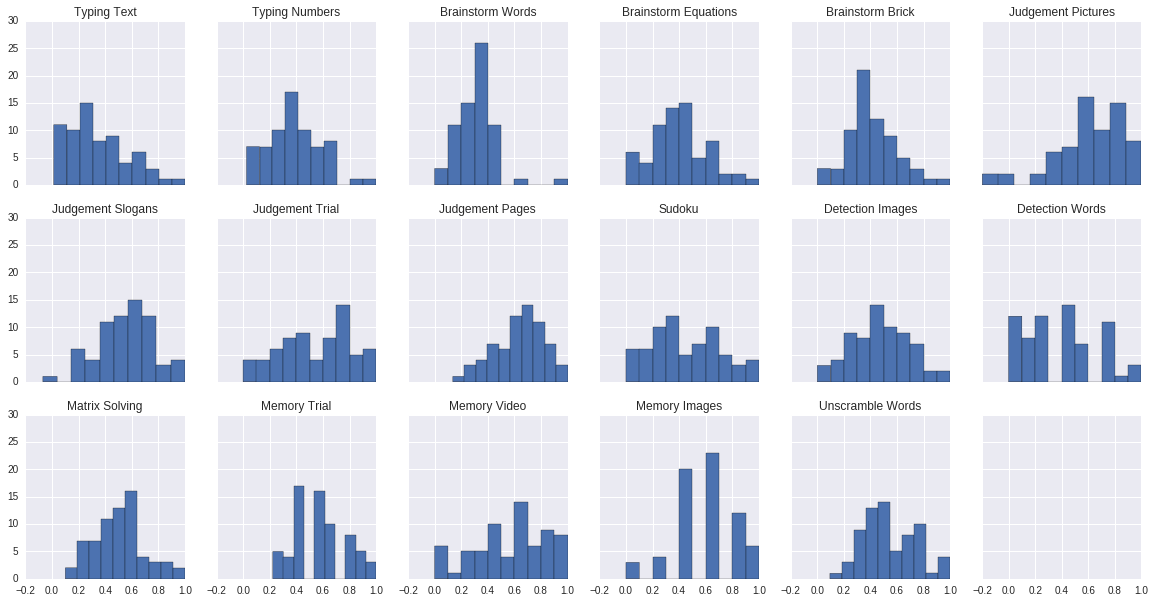

In [7]:
f, ax = plt.subplots(3, 6, sharex=True, sharey=True, figsize=(20,10))
for i in range(len(targets[0])):
    p = ax.flatten()[i]
    p.hist(targets[:,i])
    p.set_title(targets_names[i])
    #p.set_xlim(0,1)

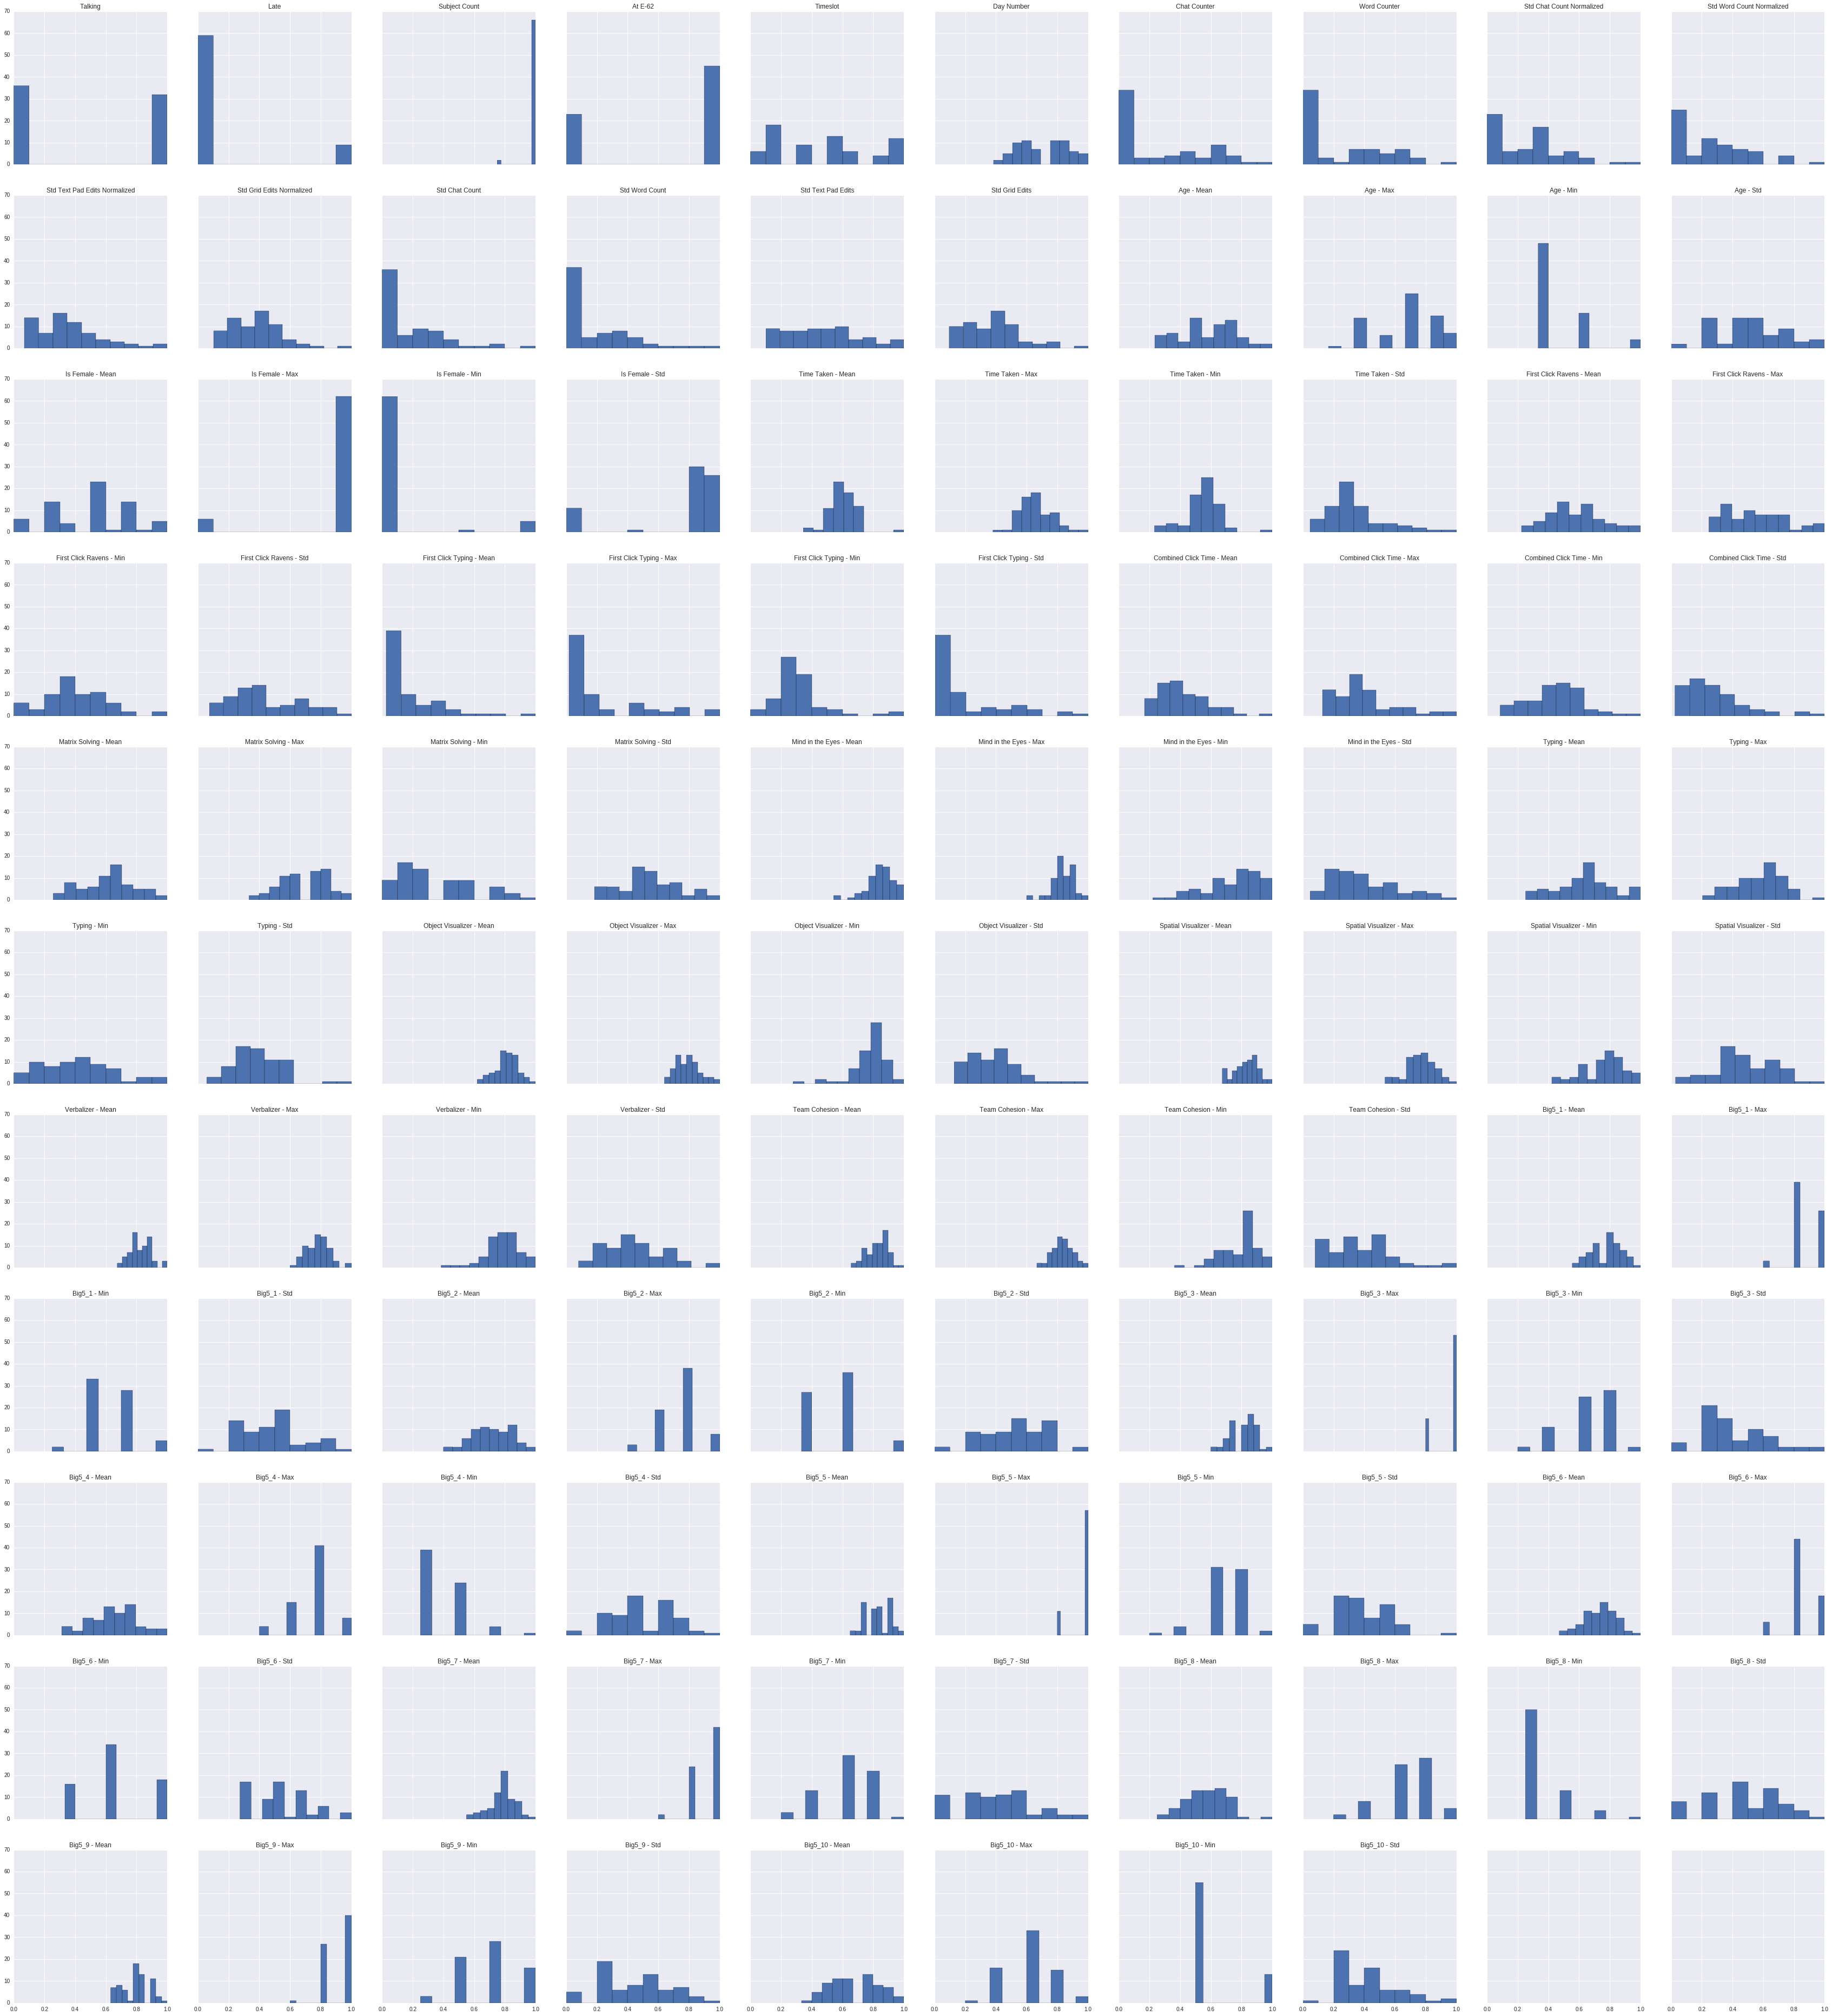

In [232]:
f, ax = plt.subplots(11, 10, sharex=True, sharey=True, figsize=(60,66))
for i in range(len(features[0])):
    p = ax.flatten()[i]
    p.hist(features[:,i])
    p.set_title(features_names[i])

feature selection

In [22]:
# feature selection
print(features.shape)
print(targets.shape)

(68, 108)
(68, 17)


In [102]:
print(coefs_enet.shape)
print(alphas_enet.shape)

(108, 100)
(100,)


*Typing Text:
  Subject Count
Is Female - Max
   Big5_3 - Max
   Big5_5 - Max
   Big5_7 - Max


*Typing Numbers:
  Subject Count
Is Female - Max
   Big5_3 - Max
   Big5_5 - Max


*Brainstorm Words:
Subject Count
 Big5_5 - Max


*Brainstorm Equations:
Subject Count
 Big5_9 - Max
 Big5_5 - Max


*Brainstorm Brick:
  Subject Count
   Big5_5 - Max
Is Female - Max


*Judgement Pictures:
  Subject Count
   Big5_3 - Max
   Big5_5 - Max
Is Female - Max
   Big5_7 - Max


*Judgement Slogans:
  Subject Count
   Big5_5 - Max
   Big5_3 - Max
Is Female - Max
   Big5_7 - Max


*Judgement Trial:
  Subject Count
Is Female - Max
   Big5_3 - Max
   Big5_5 - Max


*Judgement Pages:
 Big5_5 - Max
Subject Count
 Big5_3 - Max
 Big5_9 - Max


*Sudoku:
          Subject Count
        Is Female - Max
Mind in the Eyes - Mean
           Big5_5 - Max


*Detection Images:
Subject Count
 Big5_5 - Max
 Big5_7 - Max
 Big5_3 - Max




/usr/local/lib/python3.4/dist-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


*Detection Words:
 Big5_3 - Max
 Big5_5 - Max
Subject Count
 Big5_9 - Max
 Big5_7 - Max


*Matrix Solving:
  Subject Count
   Big5_5 - Max
Is Female - Max


*Memory Trial:
  Subject Count
   Big5_5 - Max
   Big5_3 - Max
Is Female - Max
   Big5_9 - Max


*Memory Video:
  Subject Count
Is Female - Max
   Big5_3 - Max
   Big5_5 - Max
   Big5_6 - Max


*Memory Images:
  Subject Count
   Big5_3 - Max
Is Female - Max
   Big5_9 - Max
   Big5_5 - Max


*Unscramble Words:
Subject Count
 Big5_5 - Max
 Big5_9 - Max




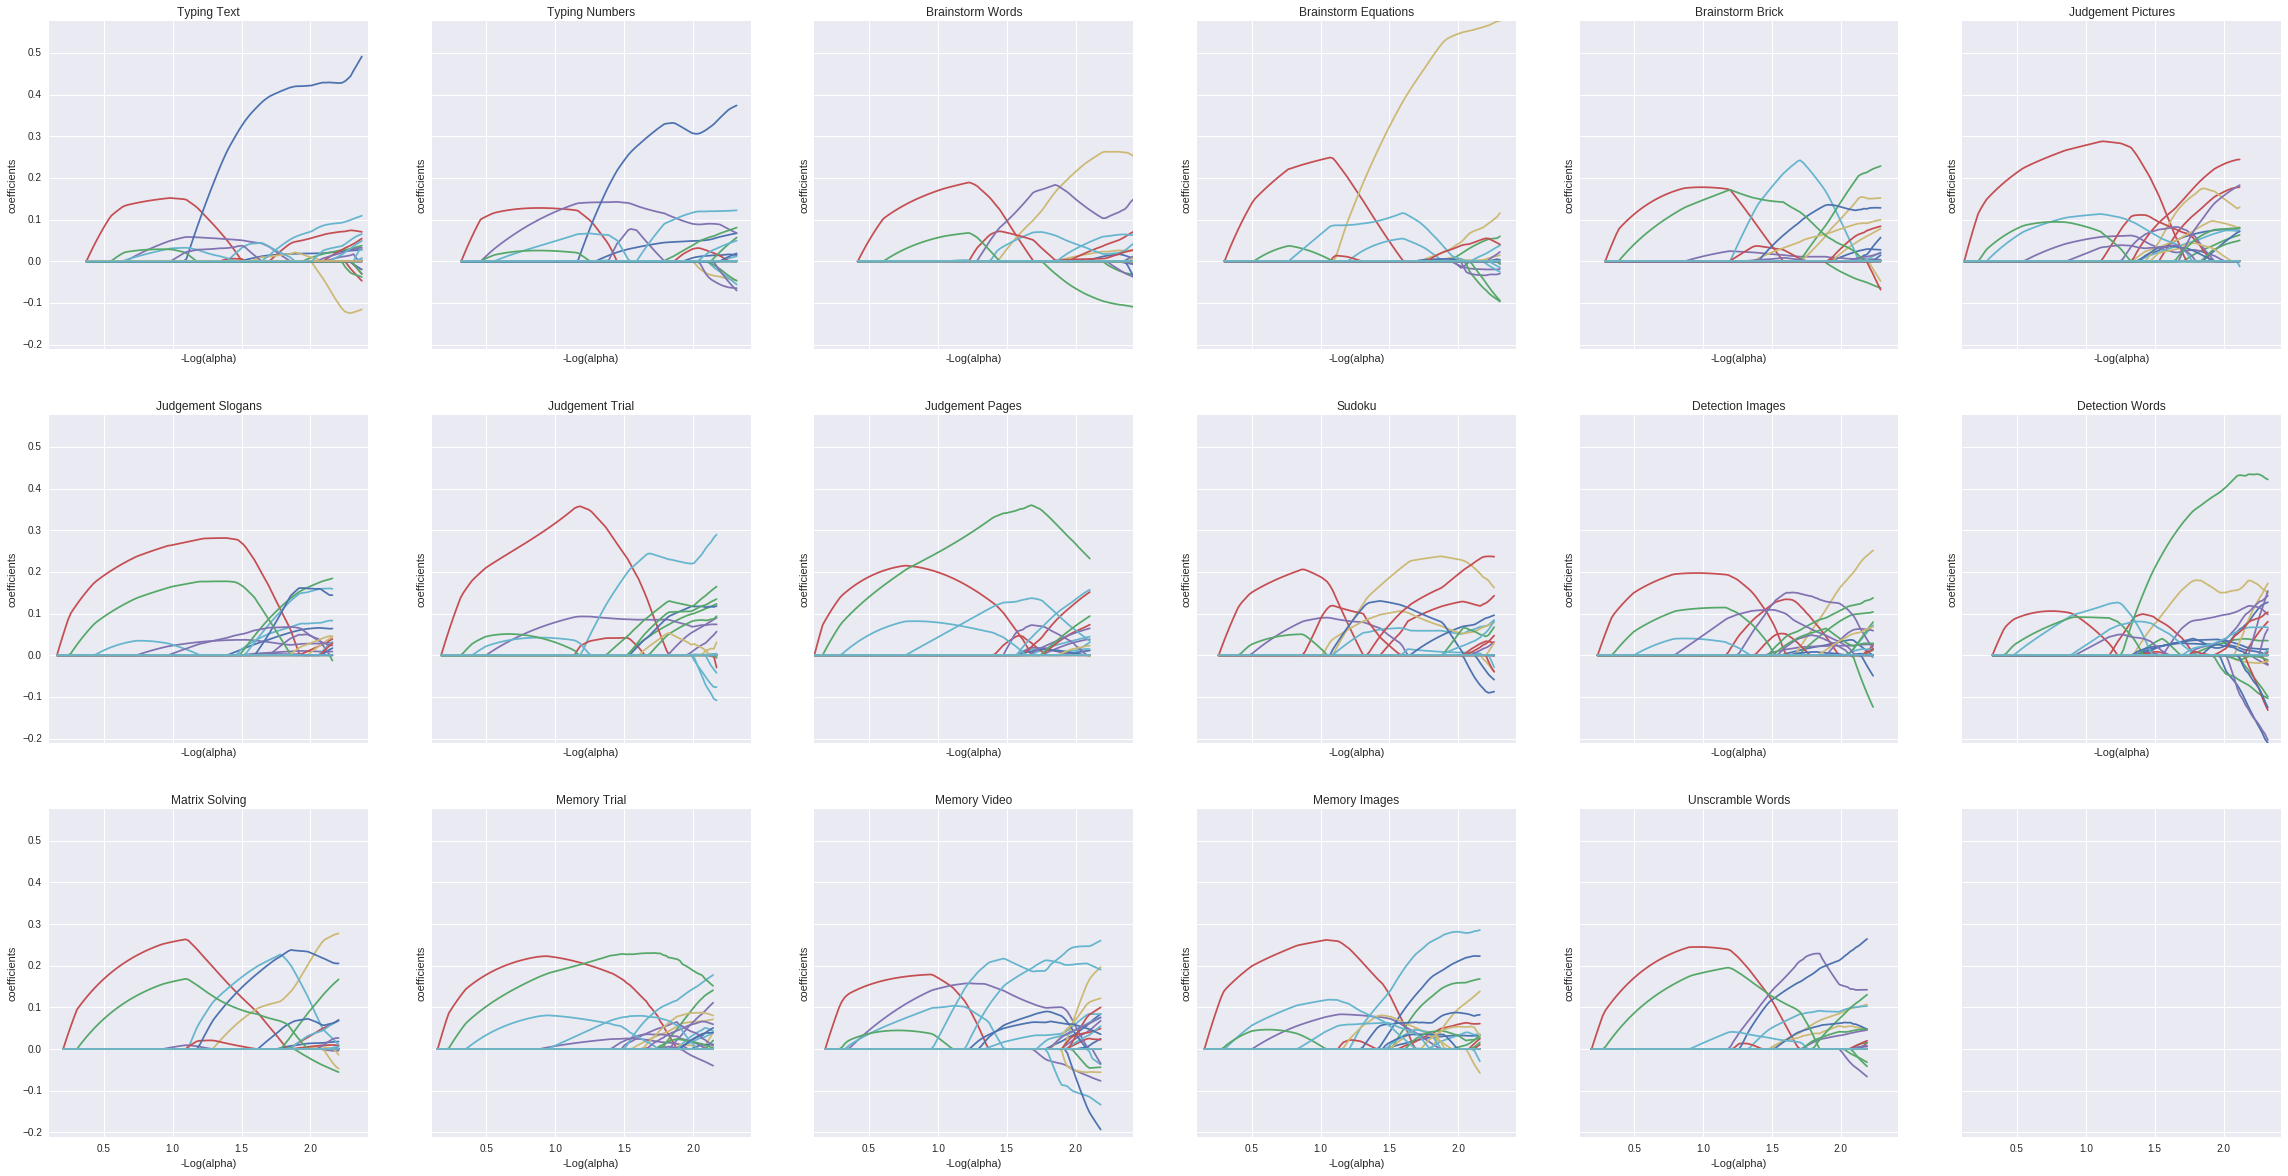

In [222]:
eps = 10e-3  # the smaller it is the longer is the path

f, ax = plt.subplots(3, 6, sharex=True, sharey=True, figsize=(40,20))
for i in range(0, tasks_no):
    alphas_enet, coefs_enet, _ = enet_path(features, targets[:,i], eps=eps, l1_ratio=0.8, fit_intercept=False)
    p = ax.flatten()[i]
    l1 = p.plot(-np.log10(alphas_enet), coefs_enet.T)
    p.set_xlabel('-Log(alpha)')
    p.set_ylabel('coefficients')
    p.set_title(targets_names[i])
    p.axis('tight')
    
    point = 0.1
    l = np.where(abs(alphas_enet - point)<0.001)
    if not l[0]:
        l = np.where(abs(alphas_enet - point)<0.01)
    chosen = coefs_enet[:,l[0][0]]
    #chosen = coefs_enet[:,np.where(abs(alphas_enet - point)<0.001)[0][0]]
    idx = np.where(chosen != 0)[0]
    idx = idx[np.argsort(chosen[idx])[::-1]]
    print('*' + targets_names[i] + ':')
    print(pd.DataFrame(features_names[idx]).to_string(index=False)[2:])
    print('\n')

Models

In [ ]:
#X_train, X_test, y_train, y_test = cross_validation.train_test_split(features, targets[:,0], test_size=0.37, random_state=0)
#X_train.shape, y_train.shape
#X_test.shape, y_test.shape

In [17]:
model = svm.SVR(kernel='rbf', C=10)

Prediction

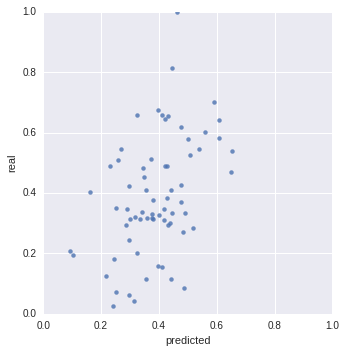

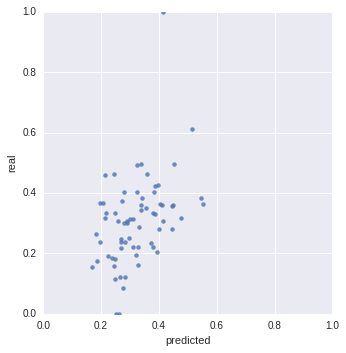

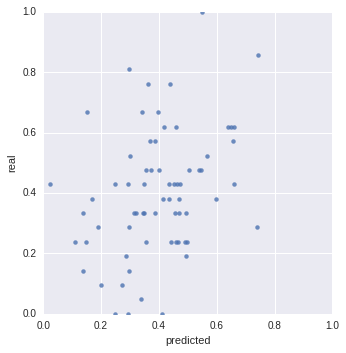

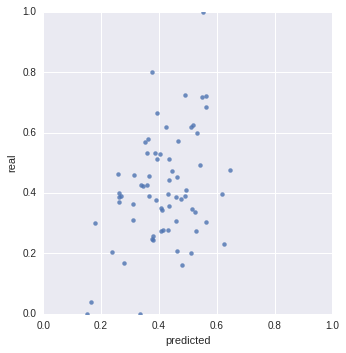

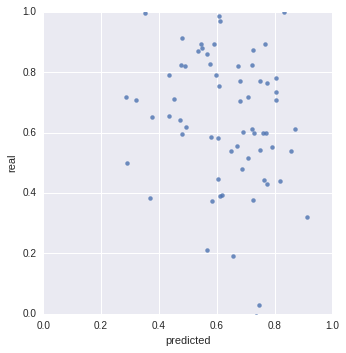

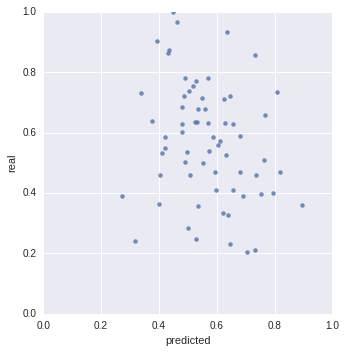

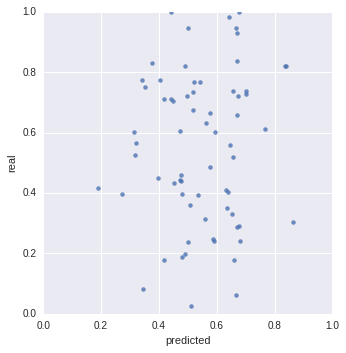

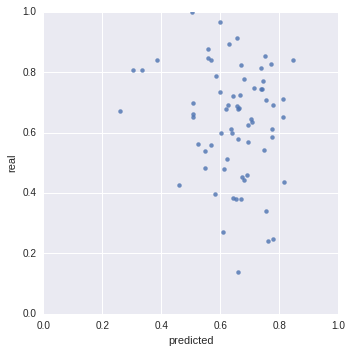

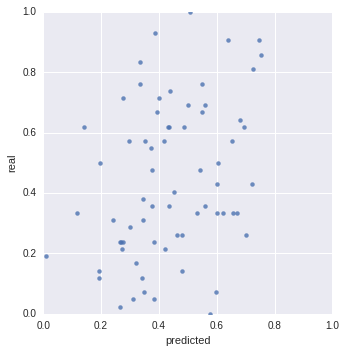

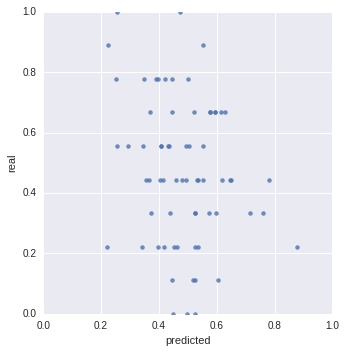

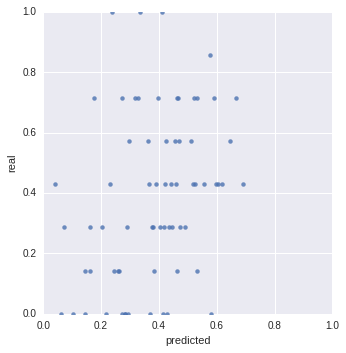

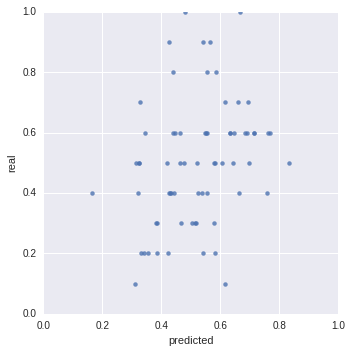

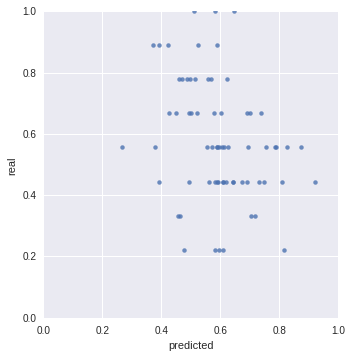

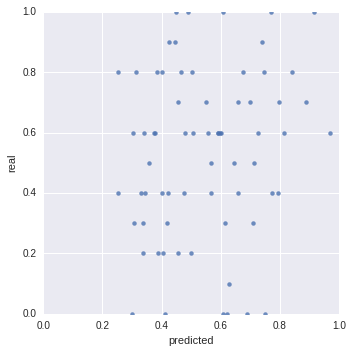

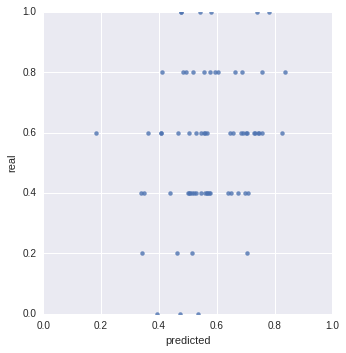

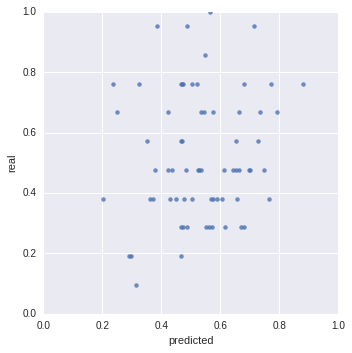

In [18]:
for i in range(1, tasks_no):
    pred = cross_validation.cross_val_predict(model, features, targets[:,i], cv=10)
    metrics.mean_squared_error(pred, targets[:,i])
    
    dt = pd.DataFrame()
    dt['predicted'] = pred
    dt['real'] = targets[:,i]
    #sns.lmplot('predicted', 'real', data=dt)
    sns.lmplot('predicted', 'real', data=dt, fit_reg=False)
    sns.plt.xlim(0,1)
    sns.plt.ylim(0,1)
    #sns.plt.title(names[i])

(0, 1)

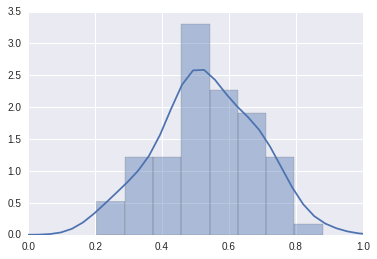

In [13]:
sns.distplot(pred)
sns.plt.xlim(0,1)

(0, 1)

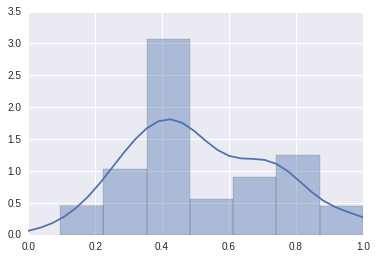

In [14]:
sns.distplot(targets[:,i])
sns.plt.xlim(0,1)